<a href="https://colab.research.google.com/github/MatthiasYeoEeLiang/BT4012-Project/blob/main/Group18_BT4012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization, Activation
from matplotlib import pyplot as plt
import seaborn as sns
import math

Exploratory Data Analysis

In [4]:
df = pd.read_csv("card_transdata.csv")
print(df)

        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715       

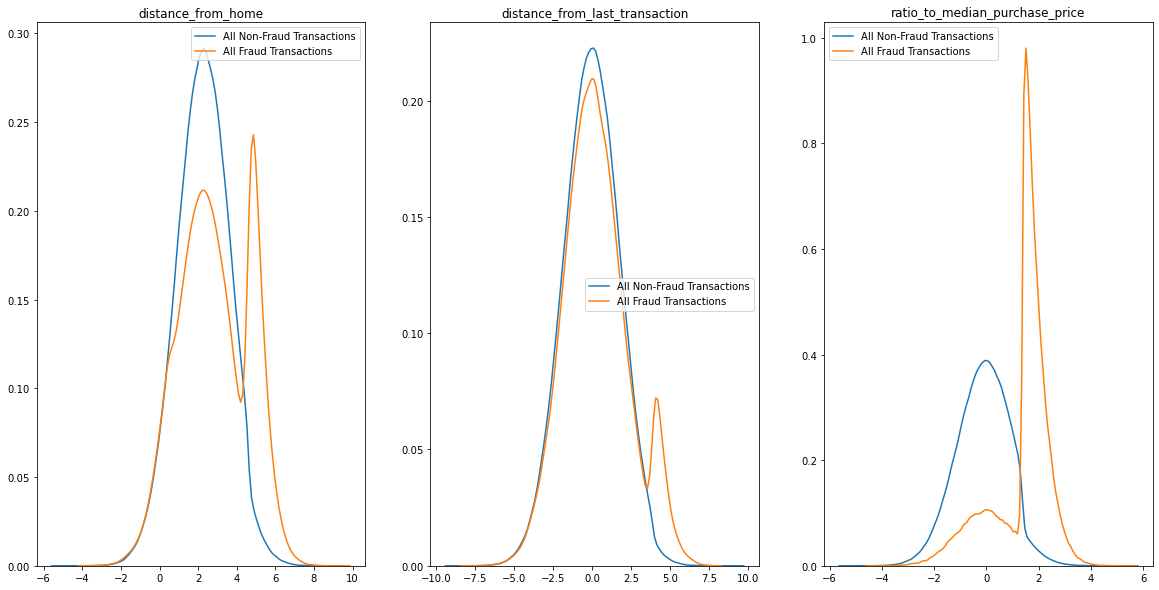

In [10]:
f, axes = plt.subplots(1, 3, figsize=(20, 10))
numerical_variables = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
for variable in numerical_variables:
  df[variable] = df[variable].map(lambda x: math.log(x))
for index, variable in enumerate(numerical_variables):
  sns.kdeplot(df[df['fraud']==0][variable], ax=axes[index])
  sns.kdeplot(df[df['fraud'] == 1][variable], ax=axes[index])
  axes[index].set_title(variable)
  axes[index].legend(['All Non-Fraud Transactions', 'All Fraud Transactions'])

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 10))
numerical_variables = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
for index, variable in enumerate(numerical_variables):
  sns.kdeplot(df[df['fraud']==0][variable], ax=axes[index])
  sns.kdeplot(df[df['fraud'] == 1][variable], ax=axes[index])
  axes[index].set_title(variable)
  axes[index].legend(['All Non-Fraud Transactions', 'All Fraud Transactions'])